# Stereo 

A script for implementing stereo algorithms 1, 2, and 3 from the lecture slides

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import numpy as np

In [4]:
# RGB to gray
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])

In [53]:
def stereo1(img1, img2, dispRange):
    # Load in both images, assumed to be RGBA 8bit per channel images
    left = img1
    right = img2    
    h, w = left.shape  # assume that both images are same size   
    
    # Depth (or disparity) map
    depth = np.zeros((h, w), np.uint8)
    
    print('img.shape : {}, depth.shape : {}'.format(left.shape, depth.shape))
    
    #kernel_half = int(windowSize / 2)    
    offset_adjust = 255 / dispRange  # this is used to map depth map output to 0-255 range
      
    for y in range(h):      
        print(".", end="", flush=True)  # let the user know that something is happening (slowly!)
        
        # each epipolar line search
        for x in range(w):
            best_offset = 0
            prev_sad = 0x1FFFFFFF
            
            for offset in range(-int(dispRange/2), int(dispRange/2)):               
                sad = 0
                sad_tmp = 0
                
                if x-offset < 0:
                    tmp = 0
                elif x-offset >= w:
                    tmp = w - 1
                else:
                    tmp = x-offset

                sad = abs(int(left[y, x]) - int(right[y, tmp]))            
                
                # if this value is smaller than the previous ssd at this block
                # then it's theoretically a closer match. Store this value against
                # this block..
                if sad < prev_sad:
                    prev_sad = sad
                    best_offset = offset
                            
            # set depth output for this x,y location to the best match
            depth[y, x] = best_offset * offset_adjust
    print('!\n')
                                
    return depth

In [54]:
def stereo2(img1, img2, dispRange, windowSize):
    i=0
    # Load in both images, assumed to be RGBA 8bit per channel images
    left = img1
    right = img2    
    h, w = left.shape  # assume that both images are same size
    
    # Depth (or disparity) map
    depth = np.zeros((h, w), np.uint8)
       
    kernel_half = int(windowSize / 2)    
    offset_adjust = 255 / dispRange  # this is used to map depth map output to 0-255 range
    for y in range(kernel_half, h - kernel_half):      
        print(".", end="", flush=True)  # let the user know that something is happening (slowly!)
        
        for x in range(kernel_half, w - kernel_half):
            best_offset = 0
            prev_ssd = 0x1FFFFFFF
            
            for offset in range(-int(dispRange/2), int(dispRange/2)):               
                ssd = 0
                ssd_tmp = 0                            
                
                # v and u are the x,y of our local window search, used to ensure a good 
                # match- going by the squared differences of two pixels alone is insufficient, 
                # we want to go by the squared differences of the neighbouring pixels too
                for v in range(-kernel_half, kernel_half):
                    for u in range(-kernel_half, kernel_half):
                        if (x+u)-offset < 0:
                            tmp = 0
                        elif (x+u)-offset >= w:
                            tmp = w - 1
                        else:
                            tmp = (x+u)-offset
                            
                        ssd_tmp = int(left[y+v, x+u]) - int(right[y+v, tmp])  
                        ssd += ssd_tmp * ssd_tmp              
                
                # if this value is smaller than the previous ssd at this block
                # then it's theoretically a closer match. Store this value against
                # this block..
                if ssd < prev_ssd:
                    prev_ssd = ssd
                    best_offset = offset
                            
            # set depth output for this x,y location to the best match
            depth[y, x] = best_offset * offset_adjust
    print('!\n')
                                
    return depth

In [55]:
def stereo3(img1, img2, dispRange, windowSize, lamda):
    raise NotImplementedError

In [56]:
img1 = "sawtooth/im2.jpg"
img2 = "sawtooth/im6.jpg"

left = rgb2gray(plt.imread(img1))
right = rgb2gray(plt.imread(img2))

dispRange = 5

disparity_map1 = stereo1(left, right, dispRange)  # 6x6 local search kernel, 30 pixel search range
disparity_map2 = stereo1(right, left, dispRange)

img.shape : (380, 434), depth.shape : (380, 434)
............................................................................................................................................................................................................................................................................................................................................................................................!

img.shape : (380, 434), depth.shape : (380, 434)
............................................................................................................................................................................................................................................................................................................................................................................................!



In [47]:
img1 = "sawtooth/im2.jpg"
img2 = "sawtooth/im6.jpg"

left = rgb2gray(plt.imread(img1))
right = rgb2gray(plt.imread(img2))

windowSize = 6
dispRange = 30

disparity_map1 = stereo2(left, right, dispRange, windowSize)  # 6x6 local search kernel, 30 pixel search range
disparity_map2 = stereo2(right, left, dispRange, windowSize)

......................................................................................................................................................................................................................................................................................................................................................................................!

......................................................................................................................................................................................................................................................................................................................................................................................!



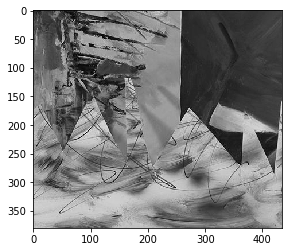

In [48]:
plt.imshow(left, cmap='gray')

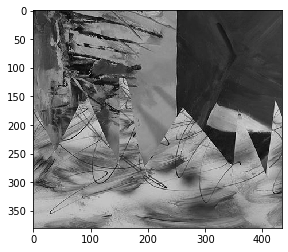

In [49]:
plt.imshow(right, cmap='gray')

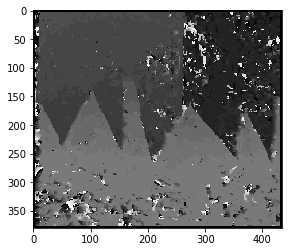

In [50]:
plt.imshow(disparity_map1, cmap='gray')

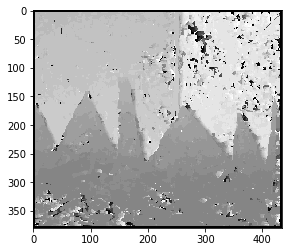

In [51]:
plt.imshow(disparity_map2, cmap='gray')